In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
# %matplotlib notebook

In [3]:
df = pd.read_csv("../data/trending_videos.csv",delimiter="|")

In [4]:
# set some configuration for graphing
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [5]:
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['year'] = df['trending_date'].dt.year
df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption,category,trending_date,year
0,nRYpj14DEvk,Dude Perfect,Zombie Airsoft Battle,5 DUDES vs 1000 ZOMBIES! Our biggest Airsoft B...,"['dude perfect', 'dude perfect stereotypes', '...",2023-11-04T14:00:00Z,2191411,93799.00,0,3626.00,PT13M15S,hd,False,Sports,2023-11-05 14:26:56.029742,2023
1,rg-2DSAL-Yw,Nick Eh 30,NickEh30 reacts to OG Fortnite!,Fortnite Chapter 4 Season 5 time travels us ba...,"['fortnite', 'fortnite gameplay', 'fortnite ba...",2023-11-05T00:26:47Z,722419,22829.00,0,1499.00,PT16M43S,hd,False,Gaming,2023-11-05 14:26:56.029785,2023
2,Opxhh9Oh3rg,TheBeatlesVEVO,The Beatles - Now And Then (Official Music Video),Now and Then's eventful journey to fruition to...,"['The', 'Beatles', 'Now', 'And', 'Then', 'UMC'...",2023-11-03T13:00:09Z,18961267,772707.00,0,51321.00,PT4M36S,hd,True,Music,2023-11-05 14:26:56.029789,2023
3,VodC8p8RYO4,E! News,Matthew Perry Laid to Rest: 'Friends' Cast in ...,The 'Friends' actor is laid to rest. Perry's c...,"['E! News Now', 'DAVID SCHWIMMER', 'DAVID_SCHW...",2023-11-04T03:00:06Z,2059514,3324.00,0,527.00,PT2M20S,hd,False,Entertainment,2023-11-05 14:26:56.029791,2023
4,6EiV6oIKPEA,LazarLazar,OG Fortnite Is Back,📷MAIN CHANNEL - https://www.youtube.com/lazarb...,"['lazarbeam', 'fortnite']",2023-11-04T05:54:01Z,2641819,128586.00,0,3224.00,PT10M1S,hd,False,Gaming,2023-11-05 14:26:56.029793,2023


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       200 non-null    object        
 1   channelTitle   200 non-null    object        
 2   title          200 non-null    object        
 3   description    199 non-null    object        
 4   tags           162 non-null    object        
 5   publishedAt    200 non-null    object        
 6   viewCount      200 non-null    int64         
 7   likeCount      196 non-null    float64       
 8   favoriteCount  200 non-null    int64         
 9   commentCount   197 non-null    float64       
 10  duration       200 non-null    object        
 11  definition     200 non-null    object        
 12  caption        200 non-null    bool          
 13  category       200 non-null    object        
 14  trending_date  200 non-null    datetime64[ns]
 15  year           200 non-

In [7]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption,category,trending_date,year
21,B77u8cjaYIs,Magic The Noah,This Is The Worst Game I’ve Made,NaN,NaN,2023-11-04T15:00:15Z,315821,24120.00,0,988.00,PT41M35S,hd,False,Entertainment,2023-11-05 14:26:56.029826,2023


In [8]:
df["description"] = df["description"].fillna(value="")

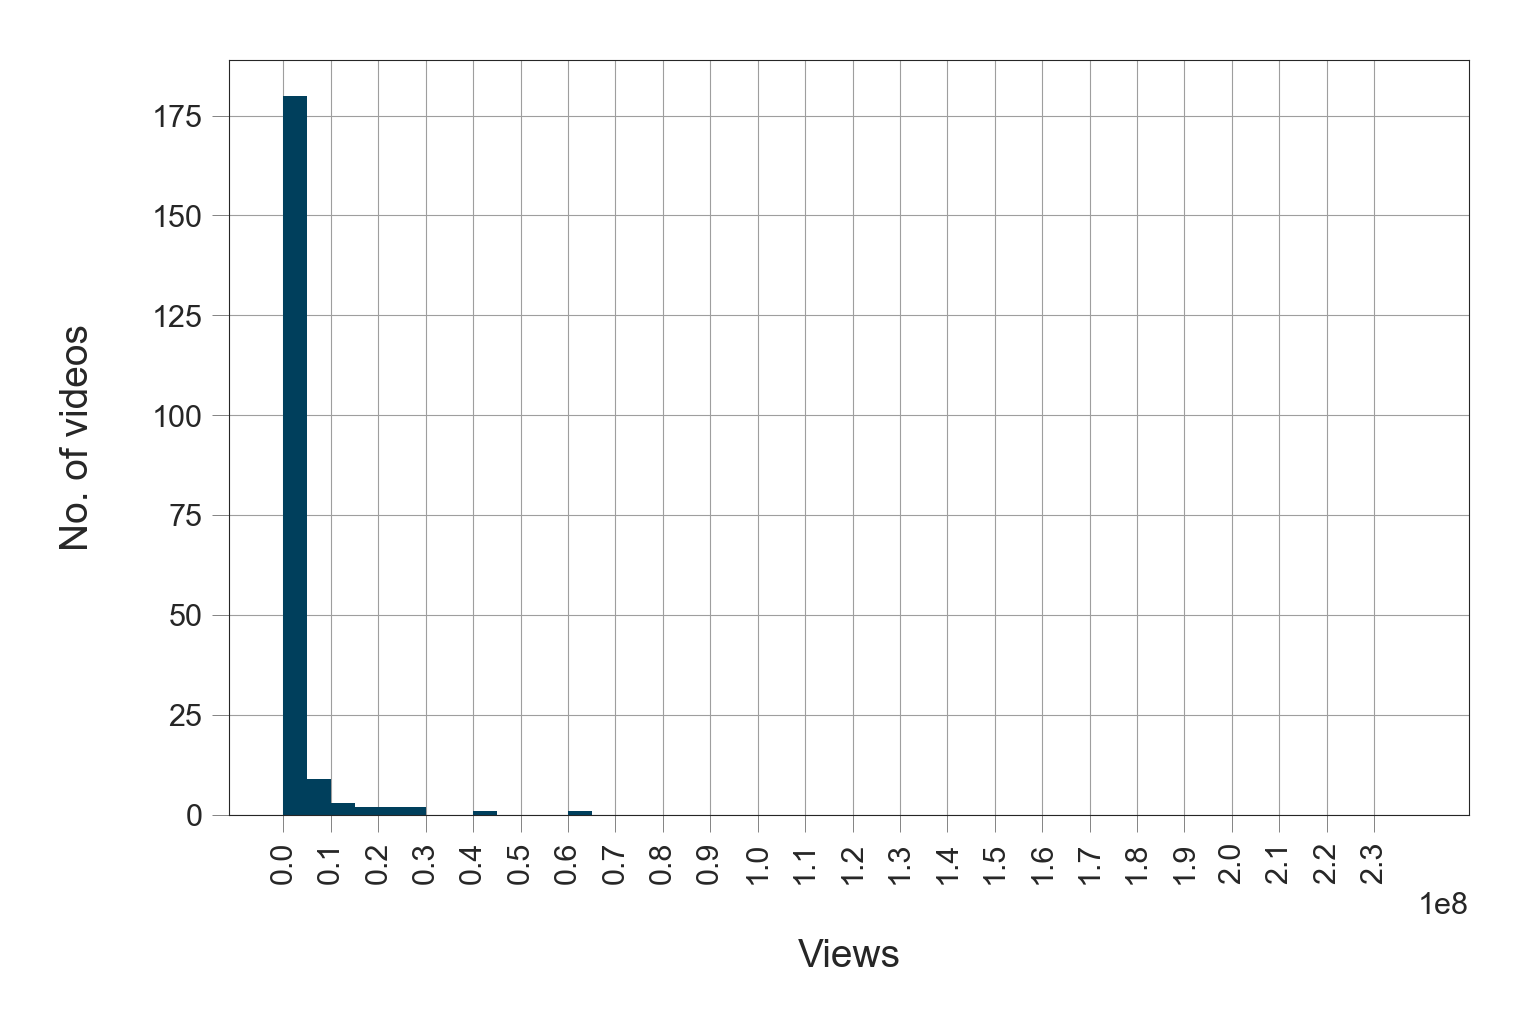

In [9]:
fig, ax = plt.subplots()
_ = sns.distplot(df["viewCount"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

### view histogram

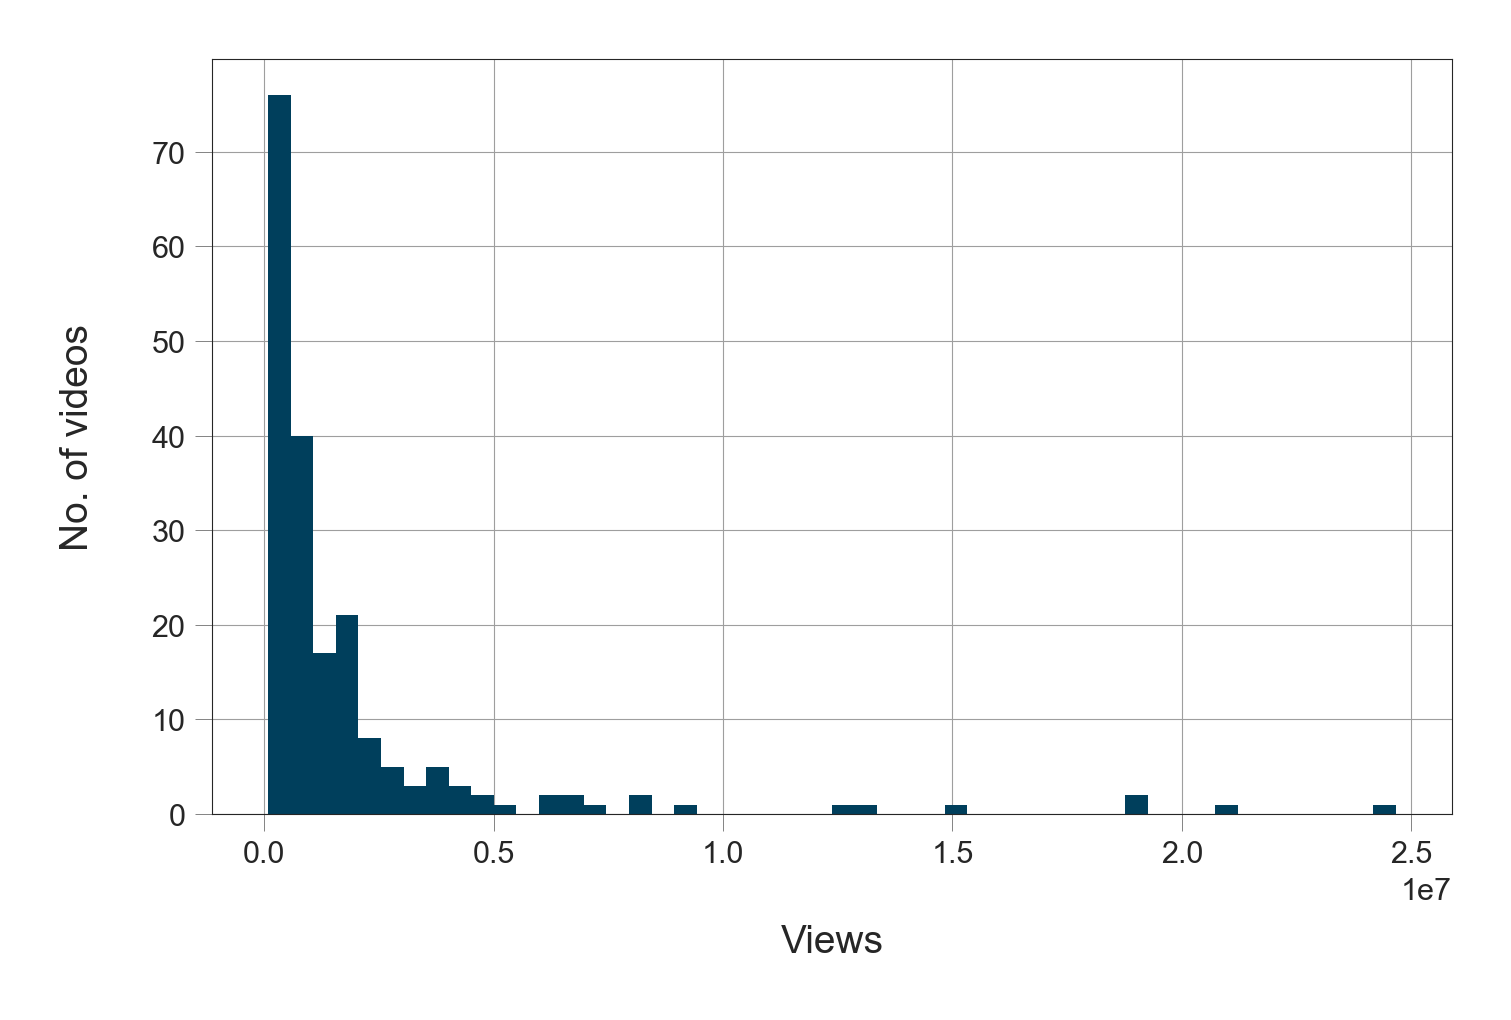

In [10]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["viewCount"] < 25e6]["viewCount"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

### likes histogram

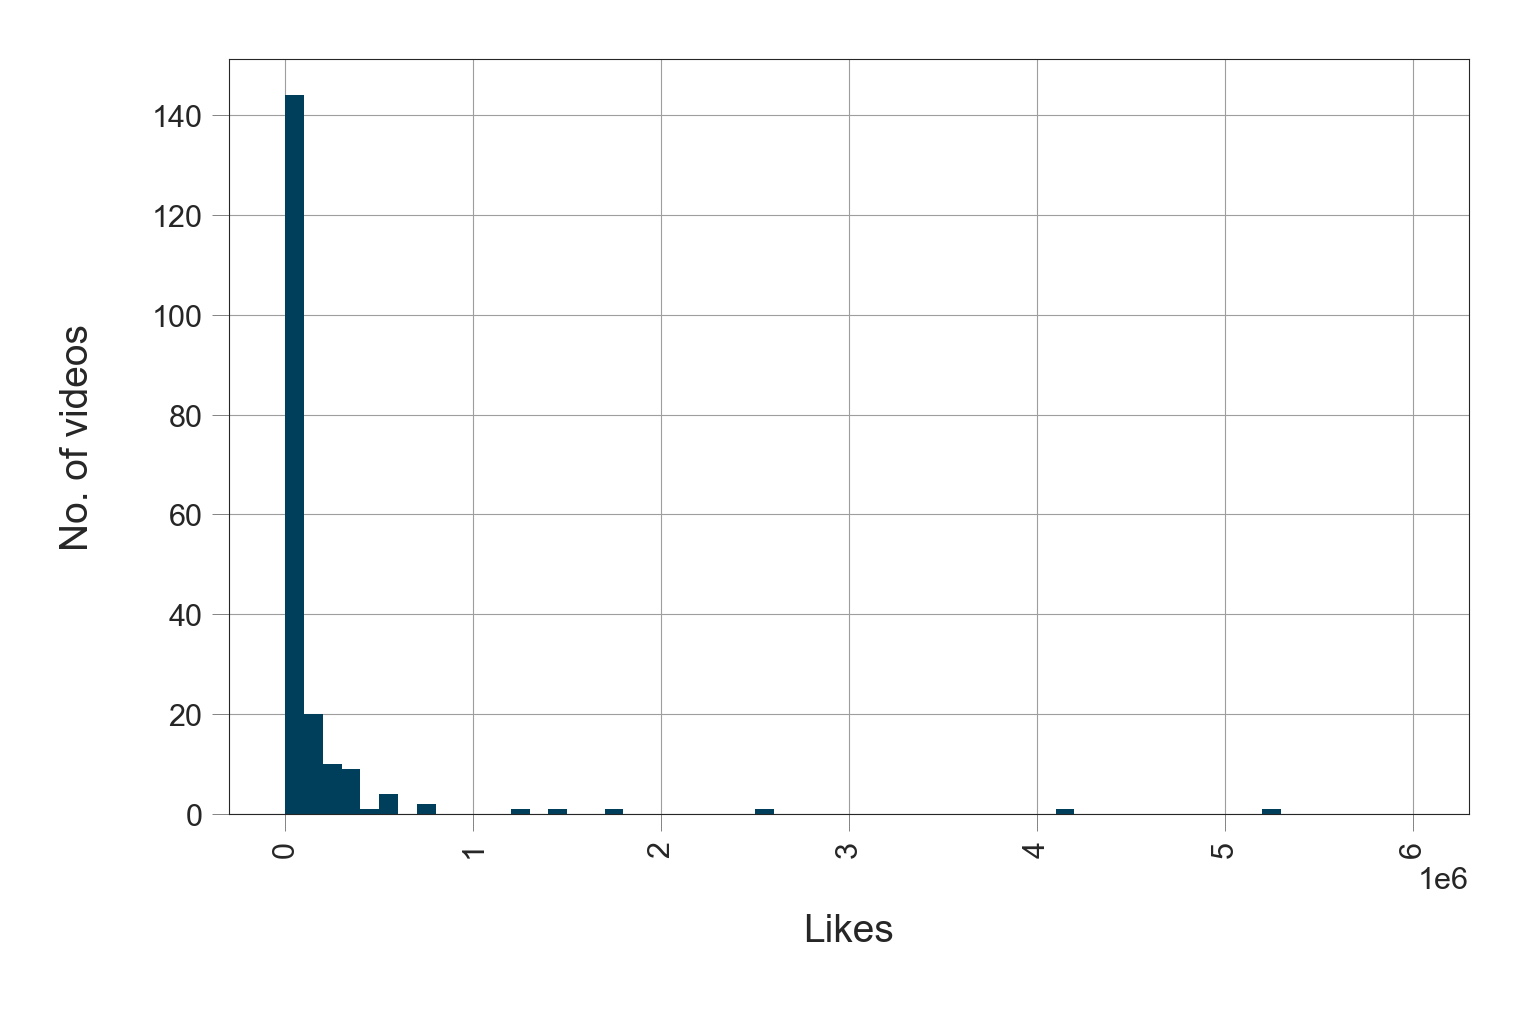

In [11]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likeCount"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

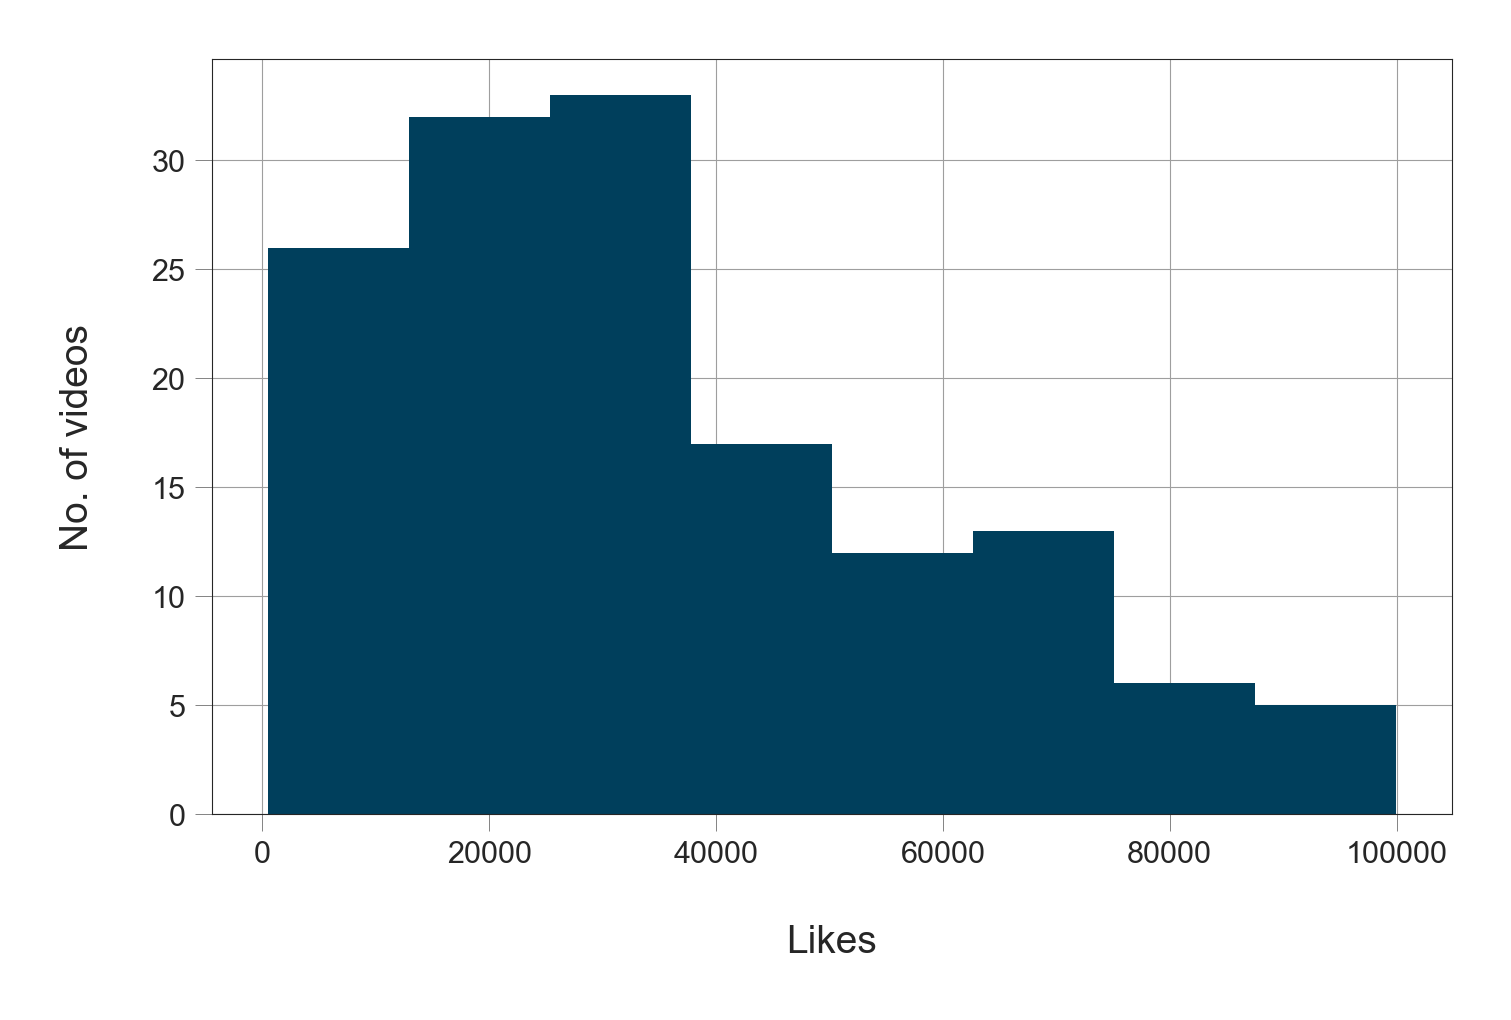

In [12]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likeCount"] <= 1e5]["likeCount"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

### how many trending video contain capitalized words?

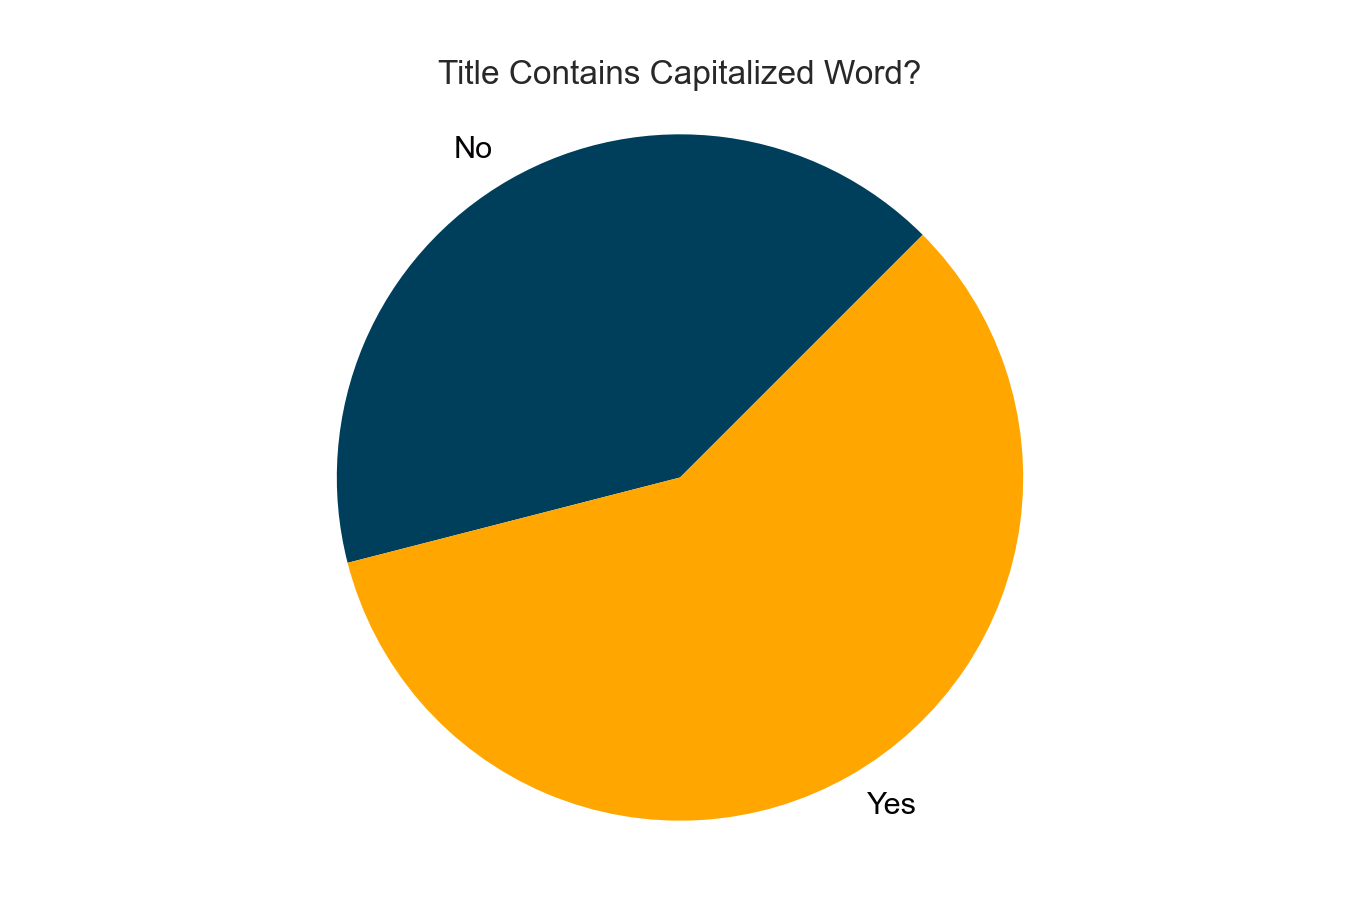

In [13]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [14]:
df["contains_capitalized"].value_counts(normalize=True)


contains_capitalized
True    0.58
False   0.41
Name: proportion, dtype: float64

### title length

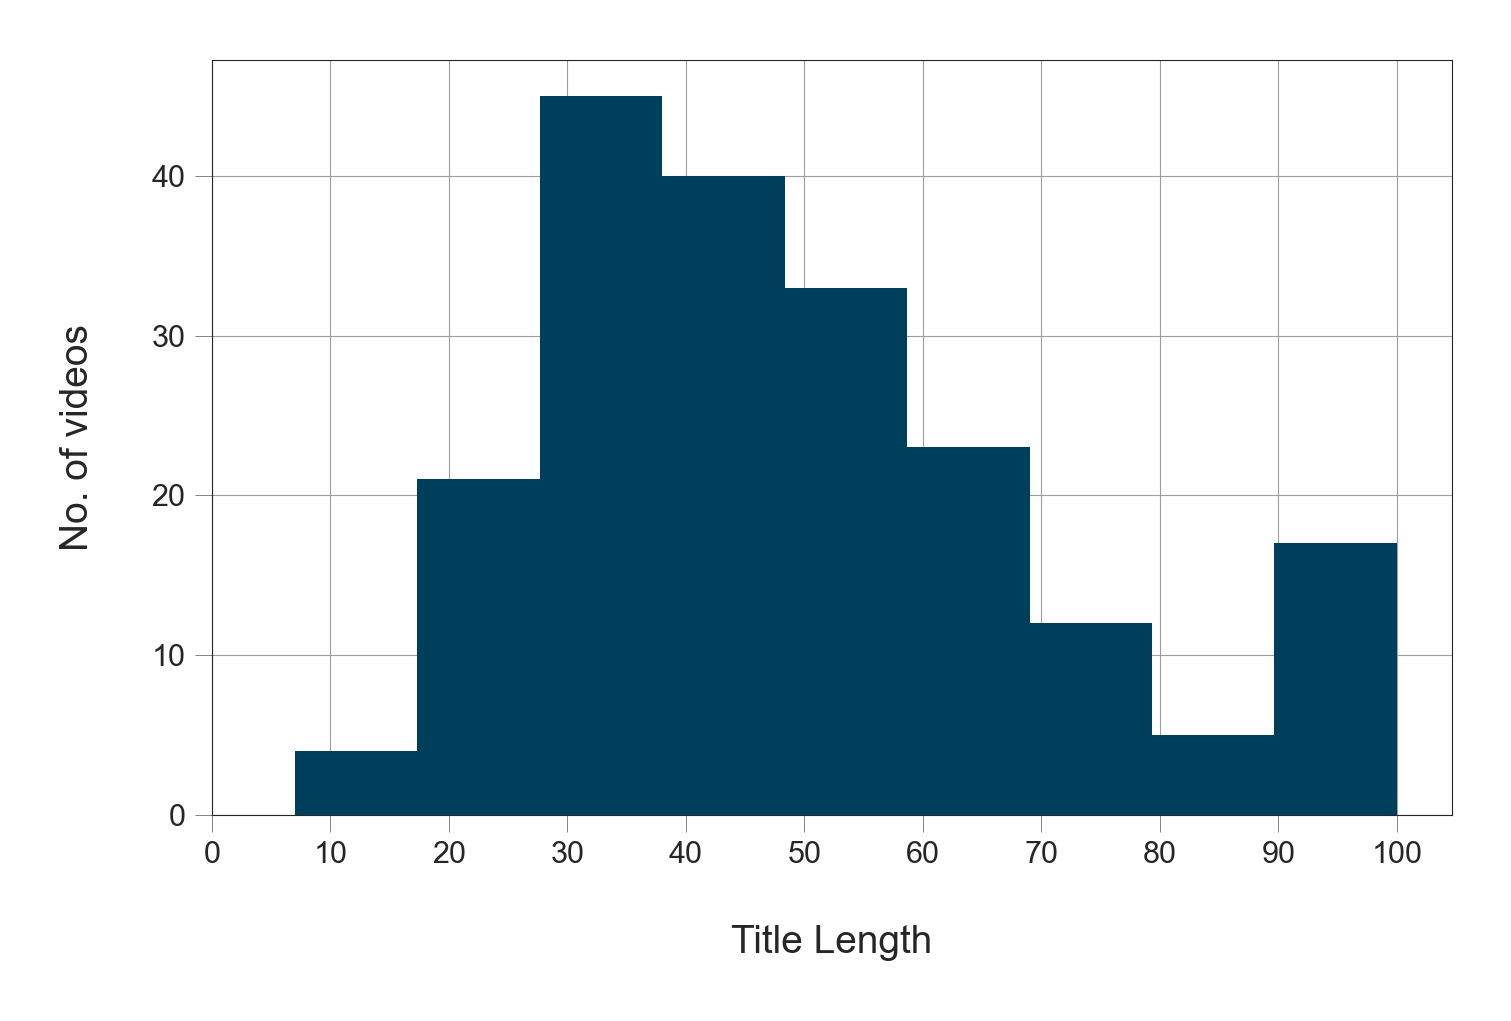

In [15]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

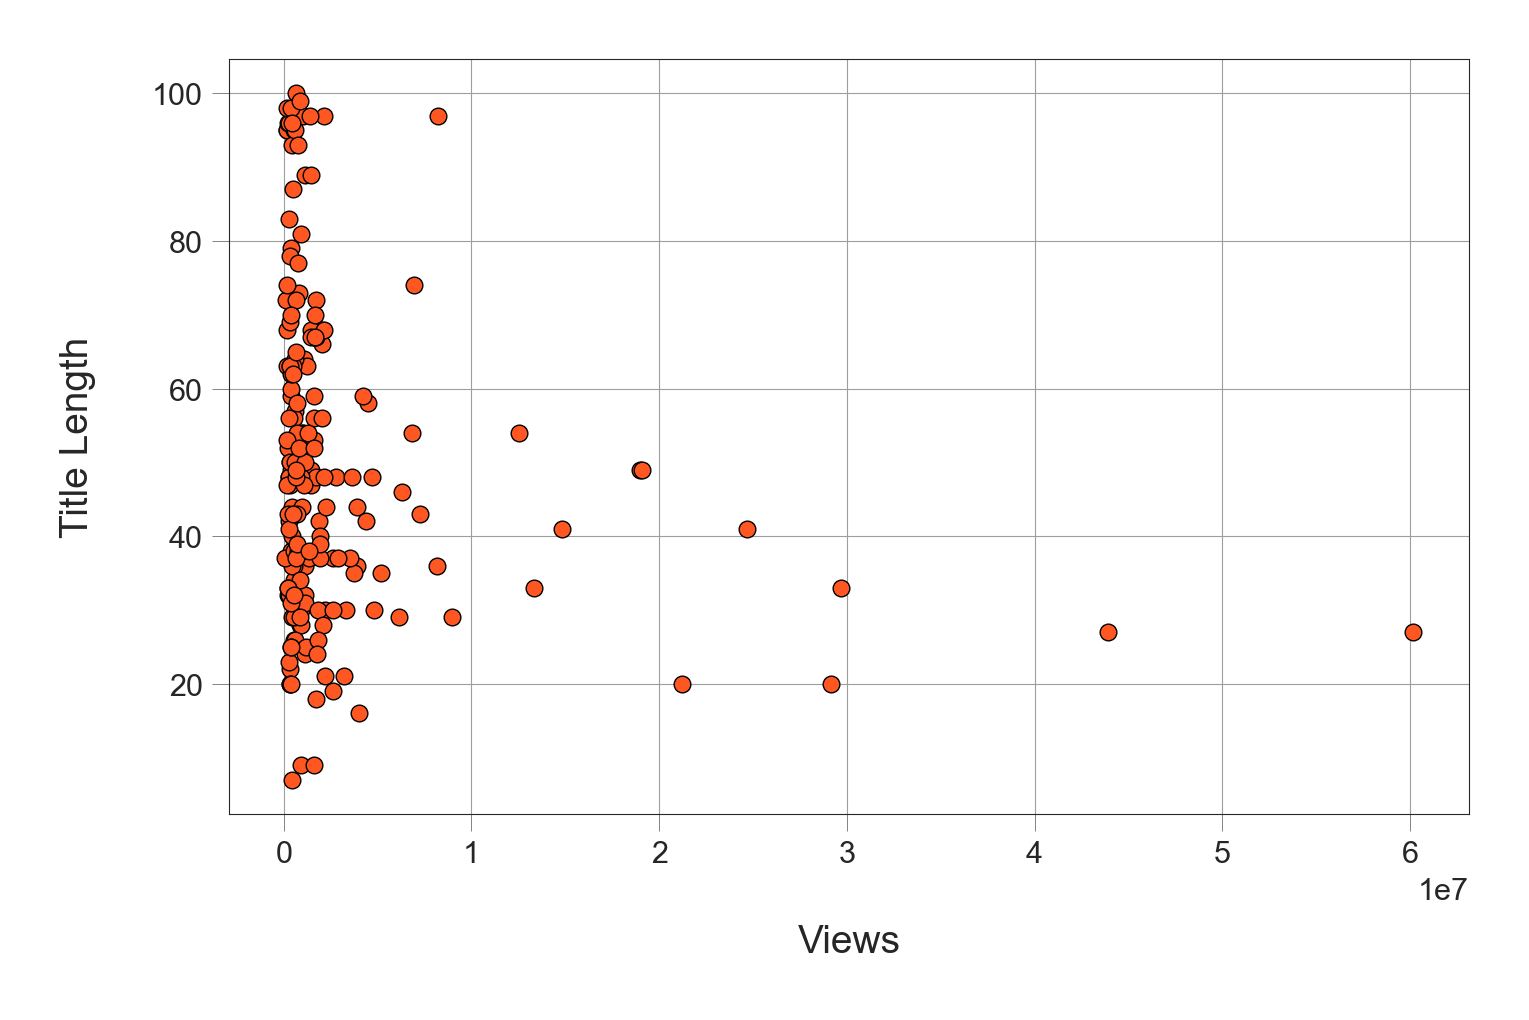

In [16]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['viewCount'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

### correlation between dataset variable

In [17]:
correlation_matrix = df[['viewCount', 'likeCount', 'commentCount']].corr()
print(correlation_matrix)

              viewCount  likeCount  commentCount
viewCount          1.00       0.89          0.50
likeCount          0.89       1.00          0.61
commentCount       0.50       0.61          1.00


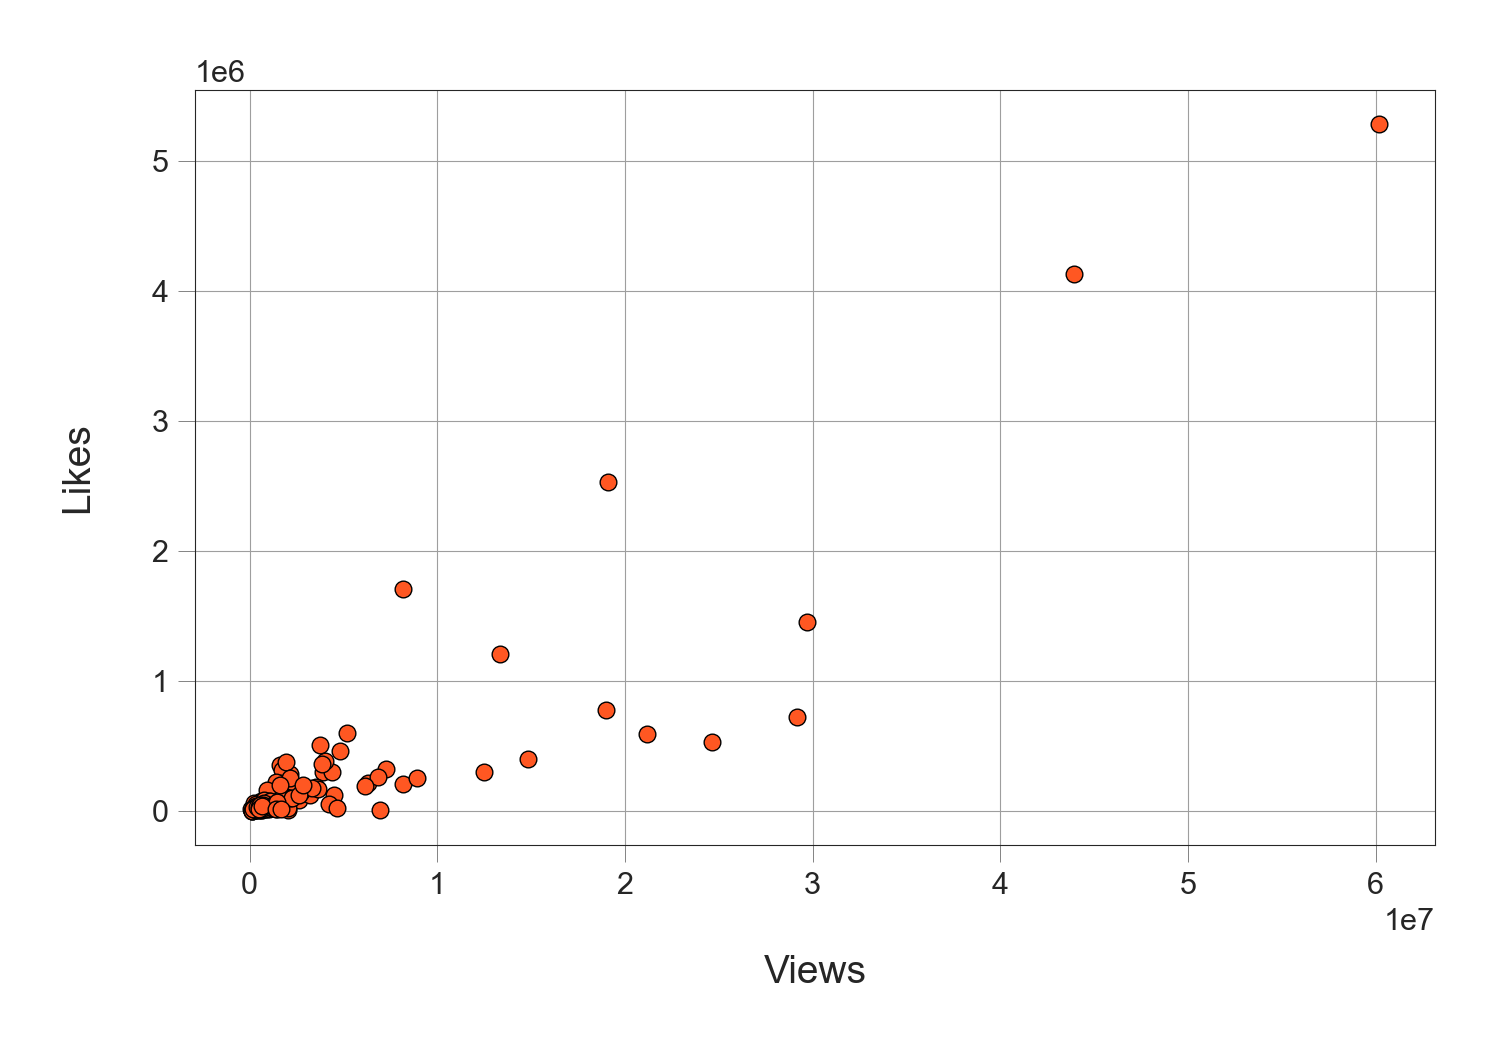

In [18]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['viewCount'], y=df['likeCount'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

### most common words in video title

In [19]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 61),
 ('-', 43),
 ('The', 30),
 ('I', 24),
 ('a', 22),
 ('the', 19),
 ('2', 15),
 ('and', 13),
 ('&', 13),
 ('to', 12),
 ('(Official', 11),
 ('in', 11),
 ('Video)', 10),
 ('Music', 9),
 ('Trailer', 9),
 ('of', 9),
 ('OG', 8),
 ('Minecraft', 8),
 ('at', 8),
 ('A', 8),
 ('[Official', 7),
 ('Video]', 7),
 ('vs.', 7),
 ('Official', 7),
 ('Teaser', 7)]

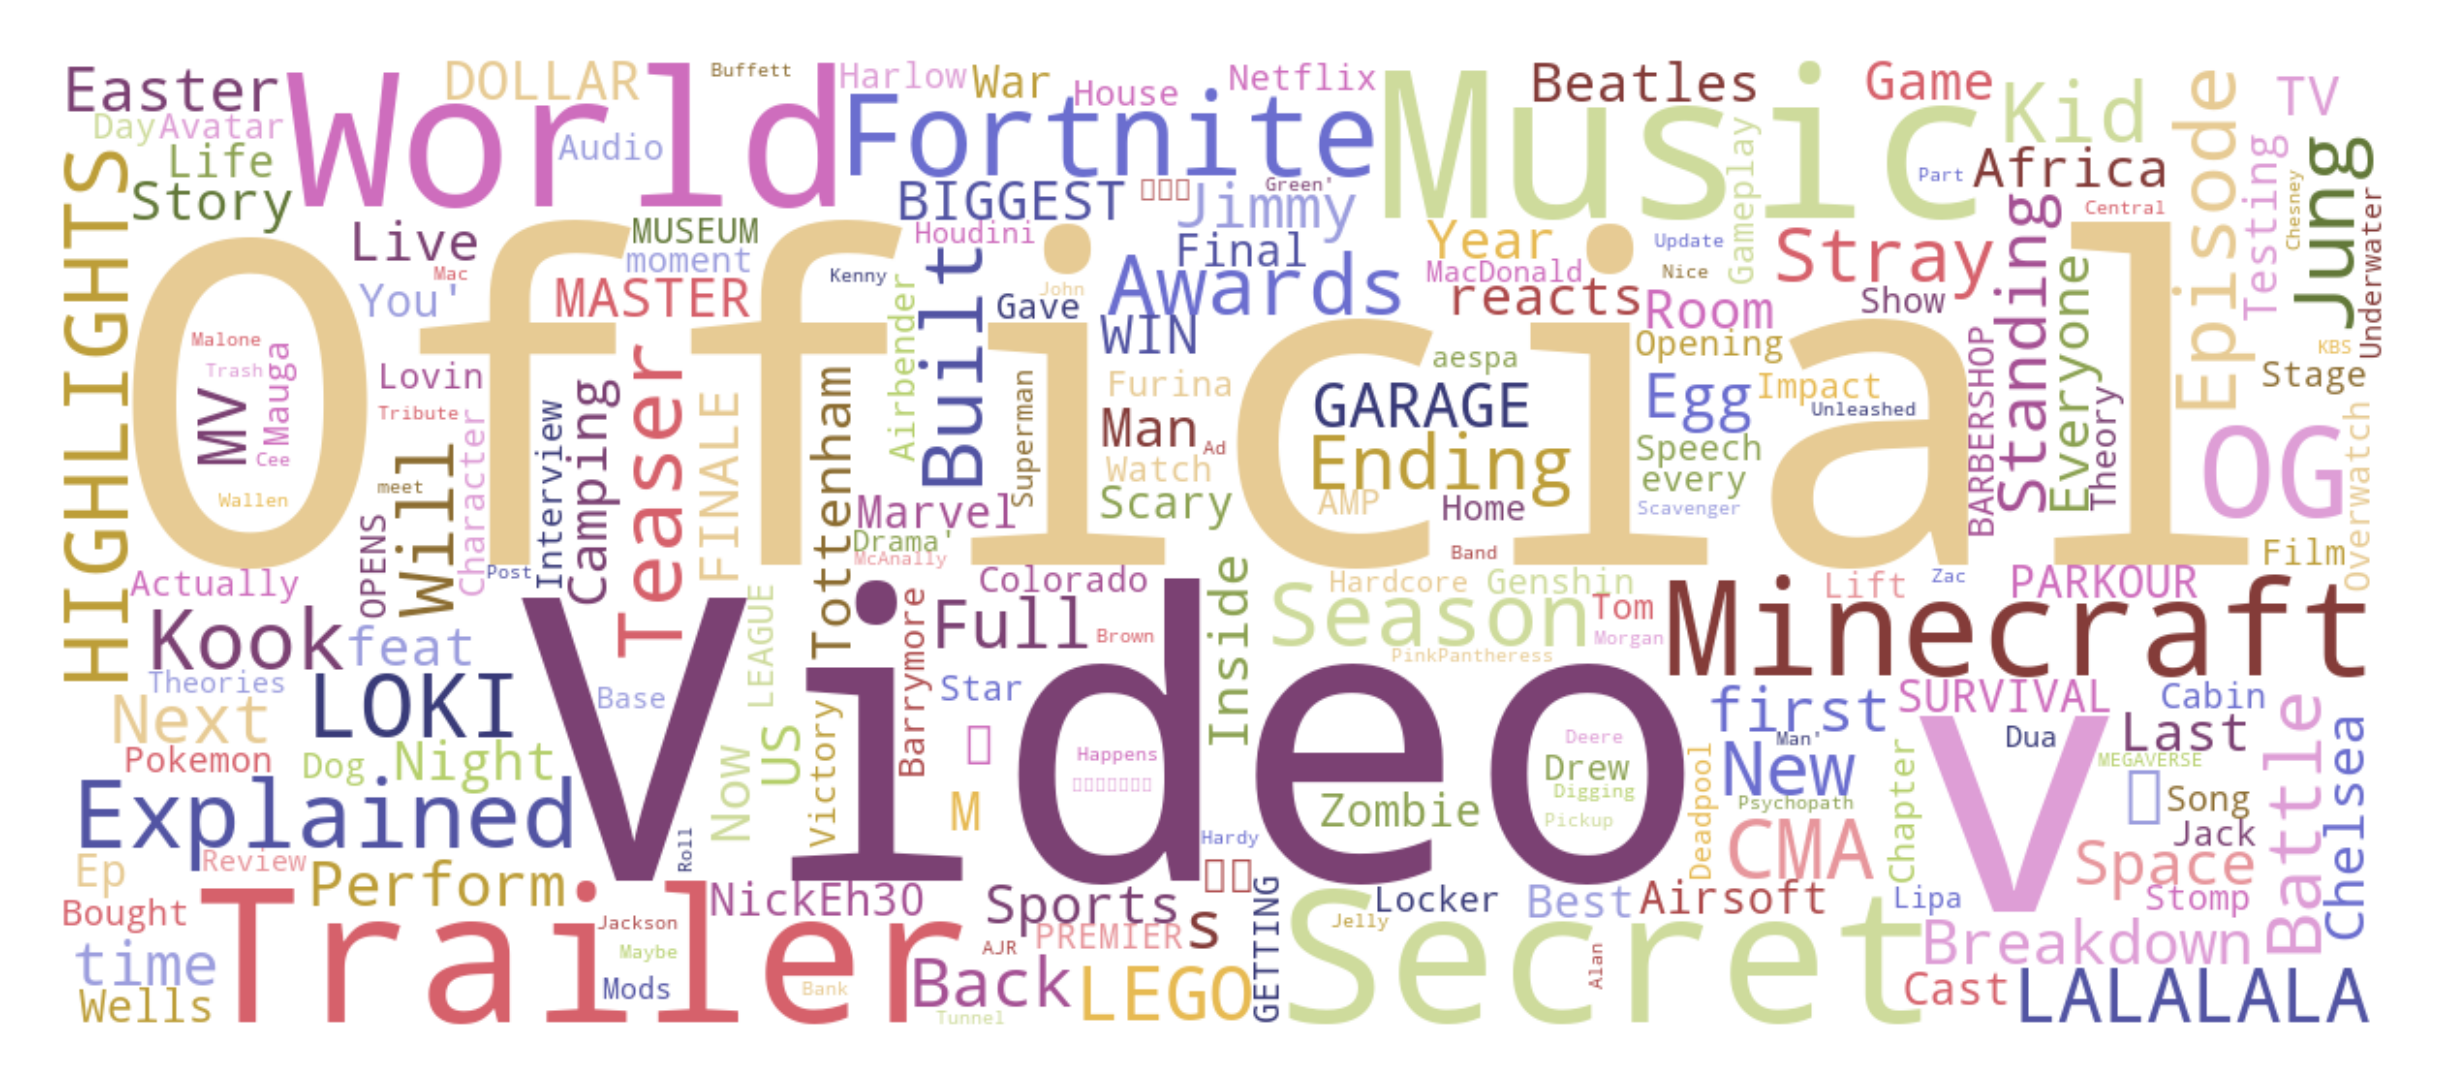

In [20]:
# wc = wordcloud.WordCloud(width=1200, height=600, collocations=False, stopwords=None, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

### which channel have the largest number of trending video

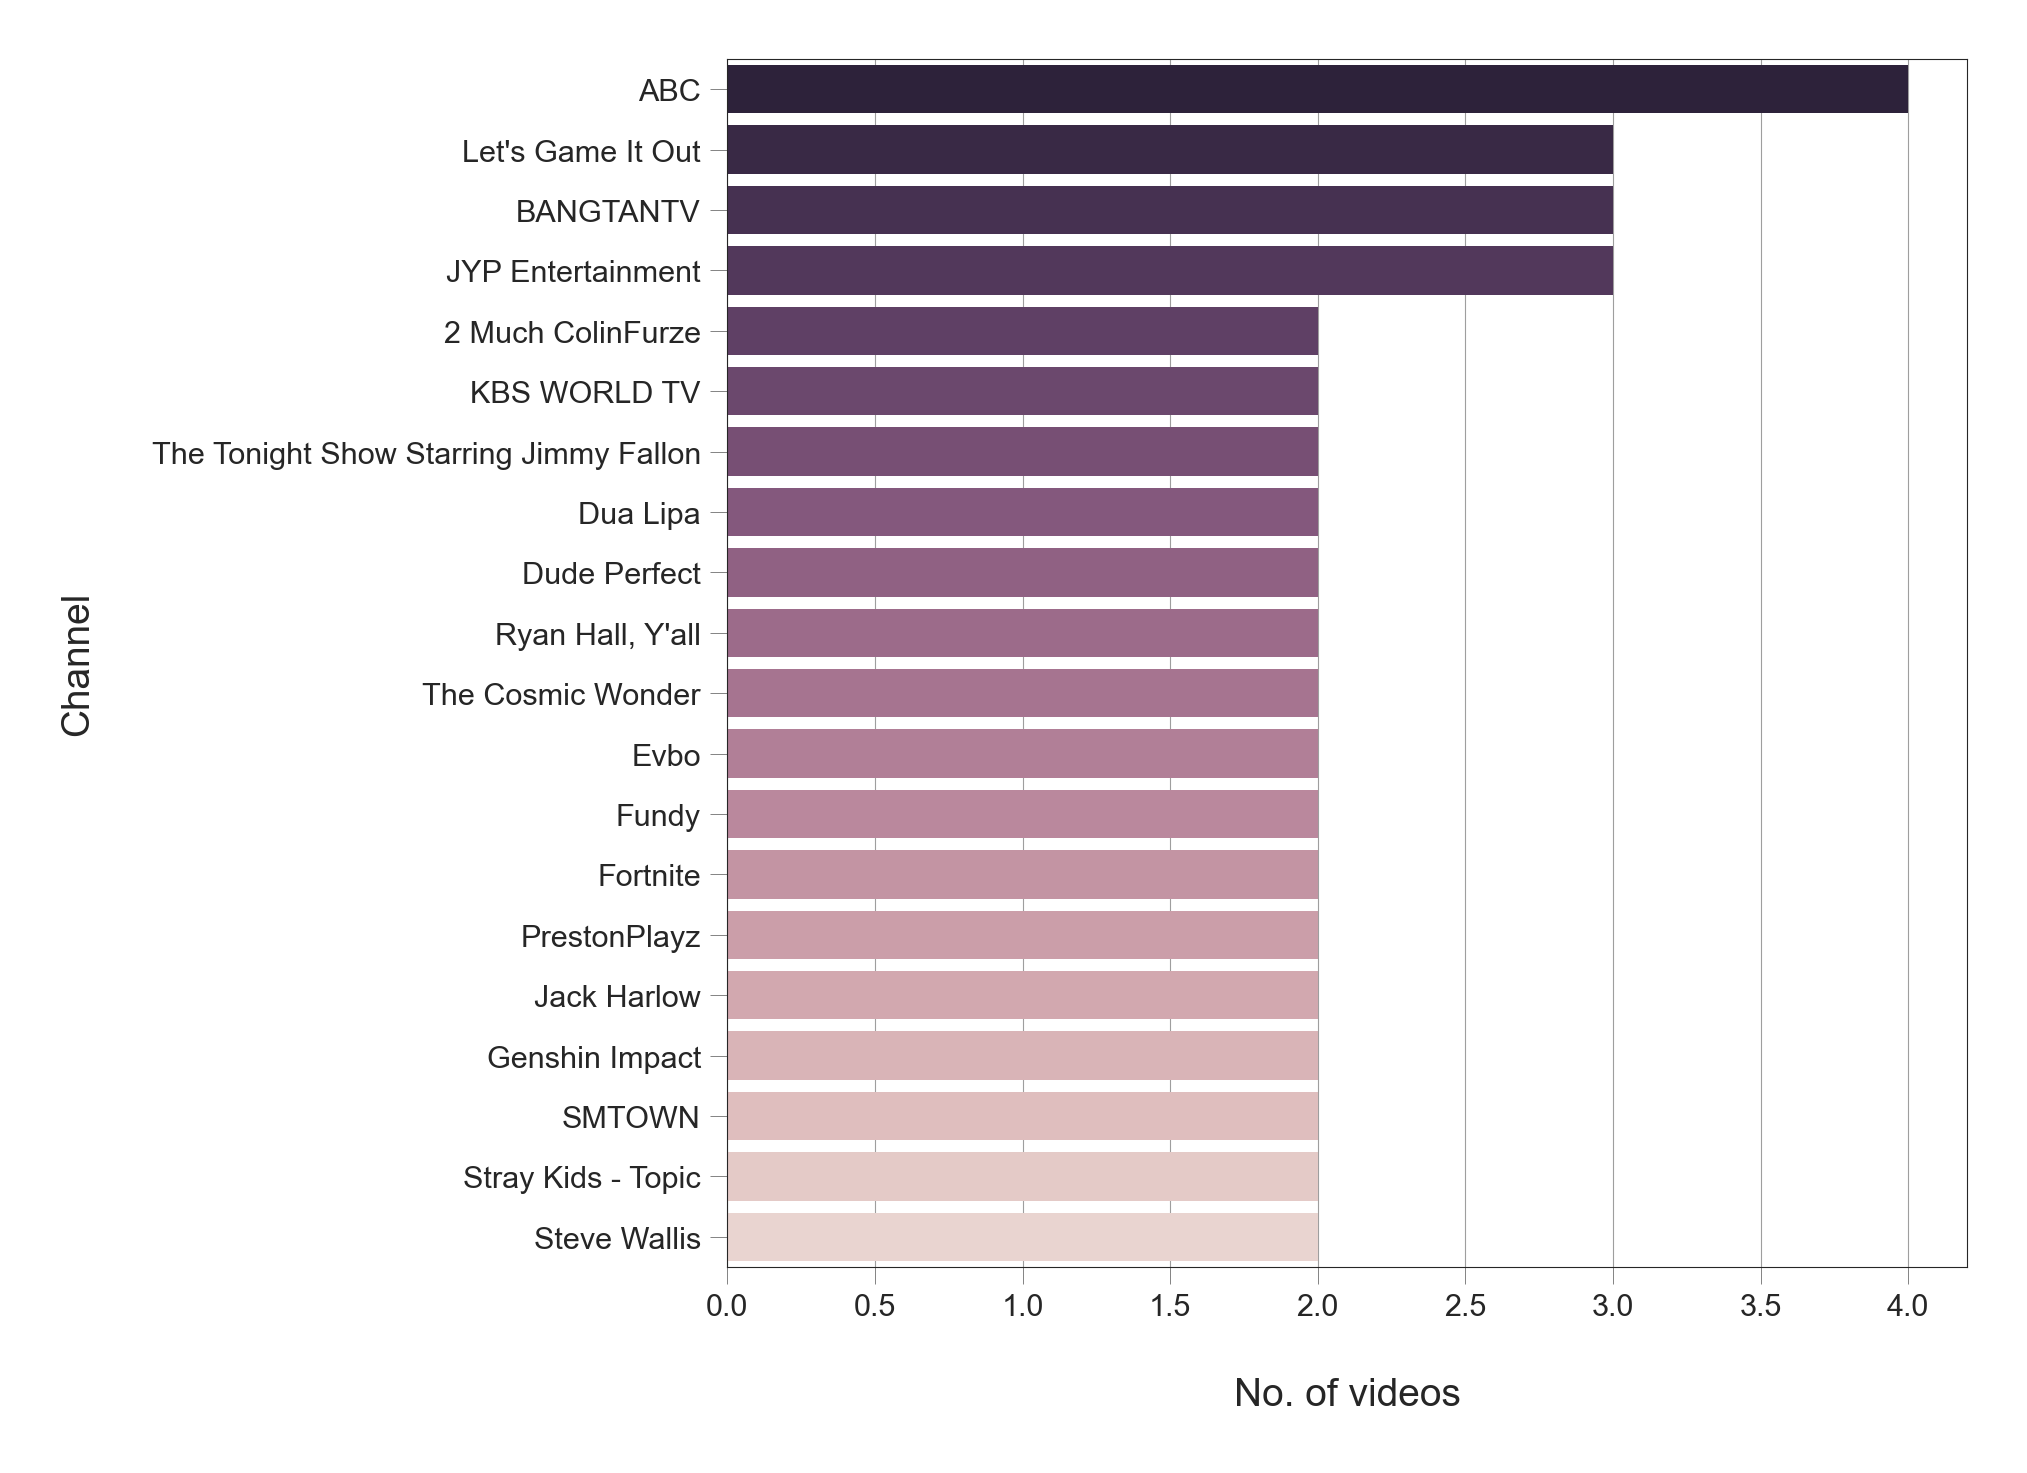

In [21]:
cdf = df.groupby("channelTitle").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channelTitle", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

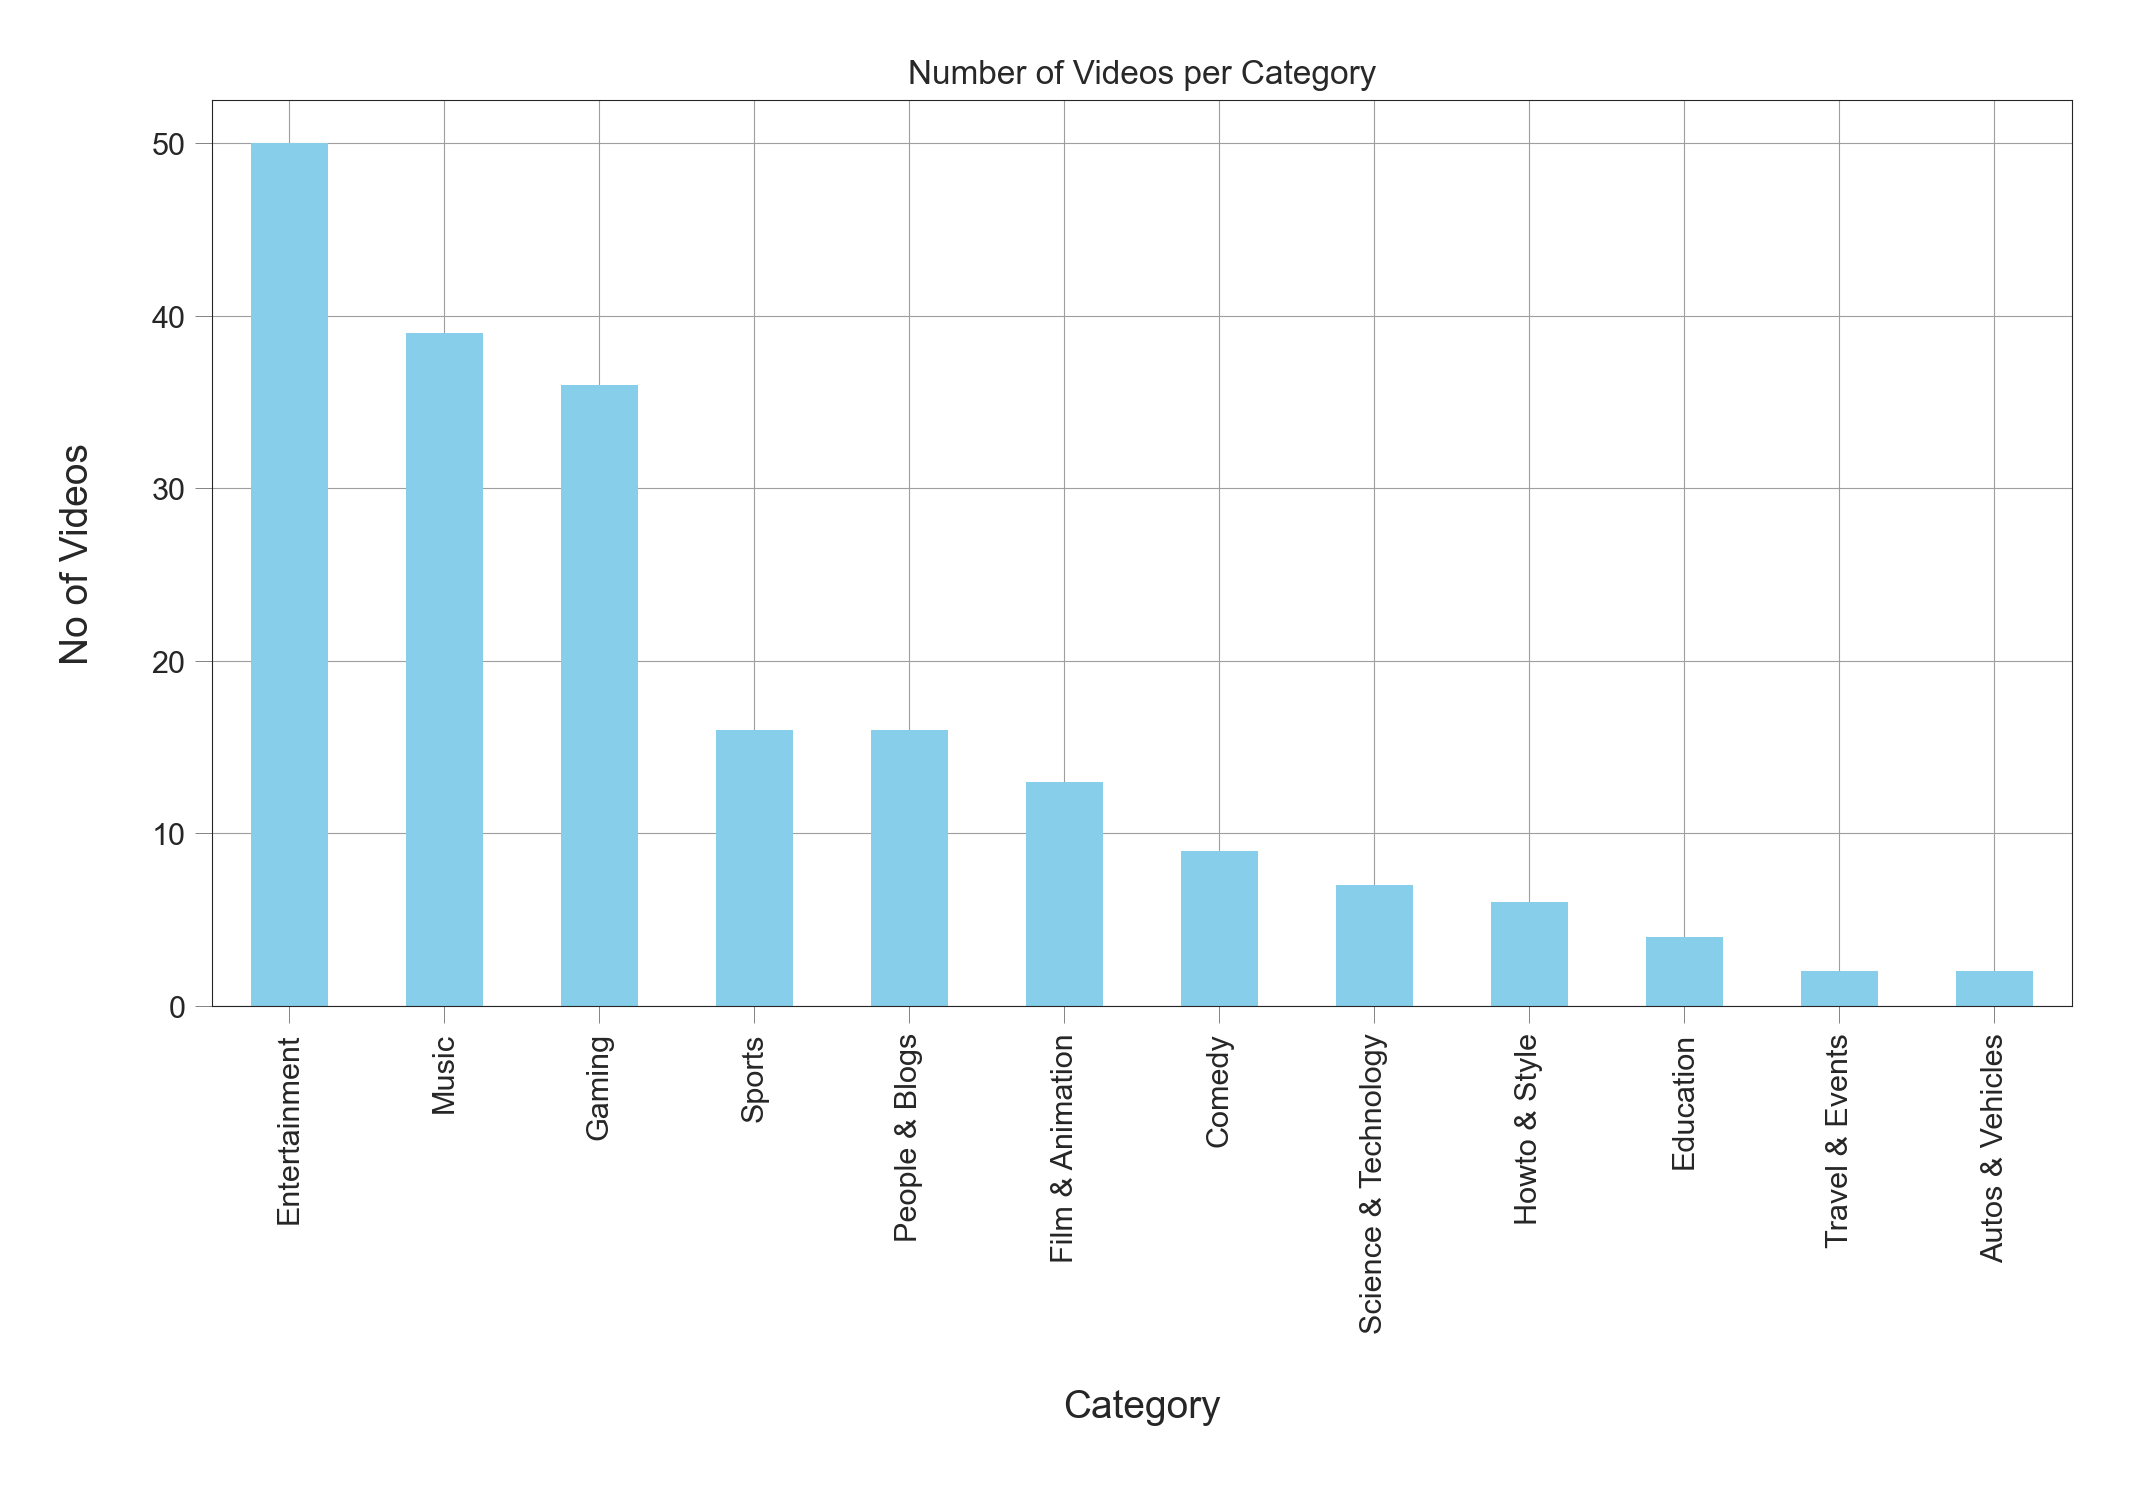

In [22]:
df = pd.read_csv("../data/trending_videos.csv",delimiter="|")

# Assuming you have a DataFrame 'df' with a column 'category'
category_counts = df['category'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Videos per Category')
plt.xlabel('Category')
plt.ylabel('No of Videos')
plt.xticks(rotation=90)
plt.show()

### trending video and there published time

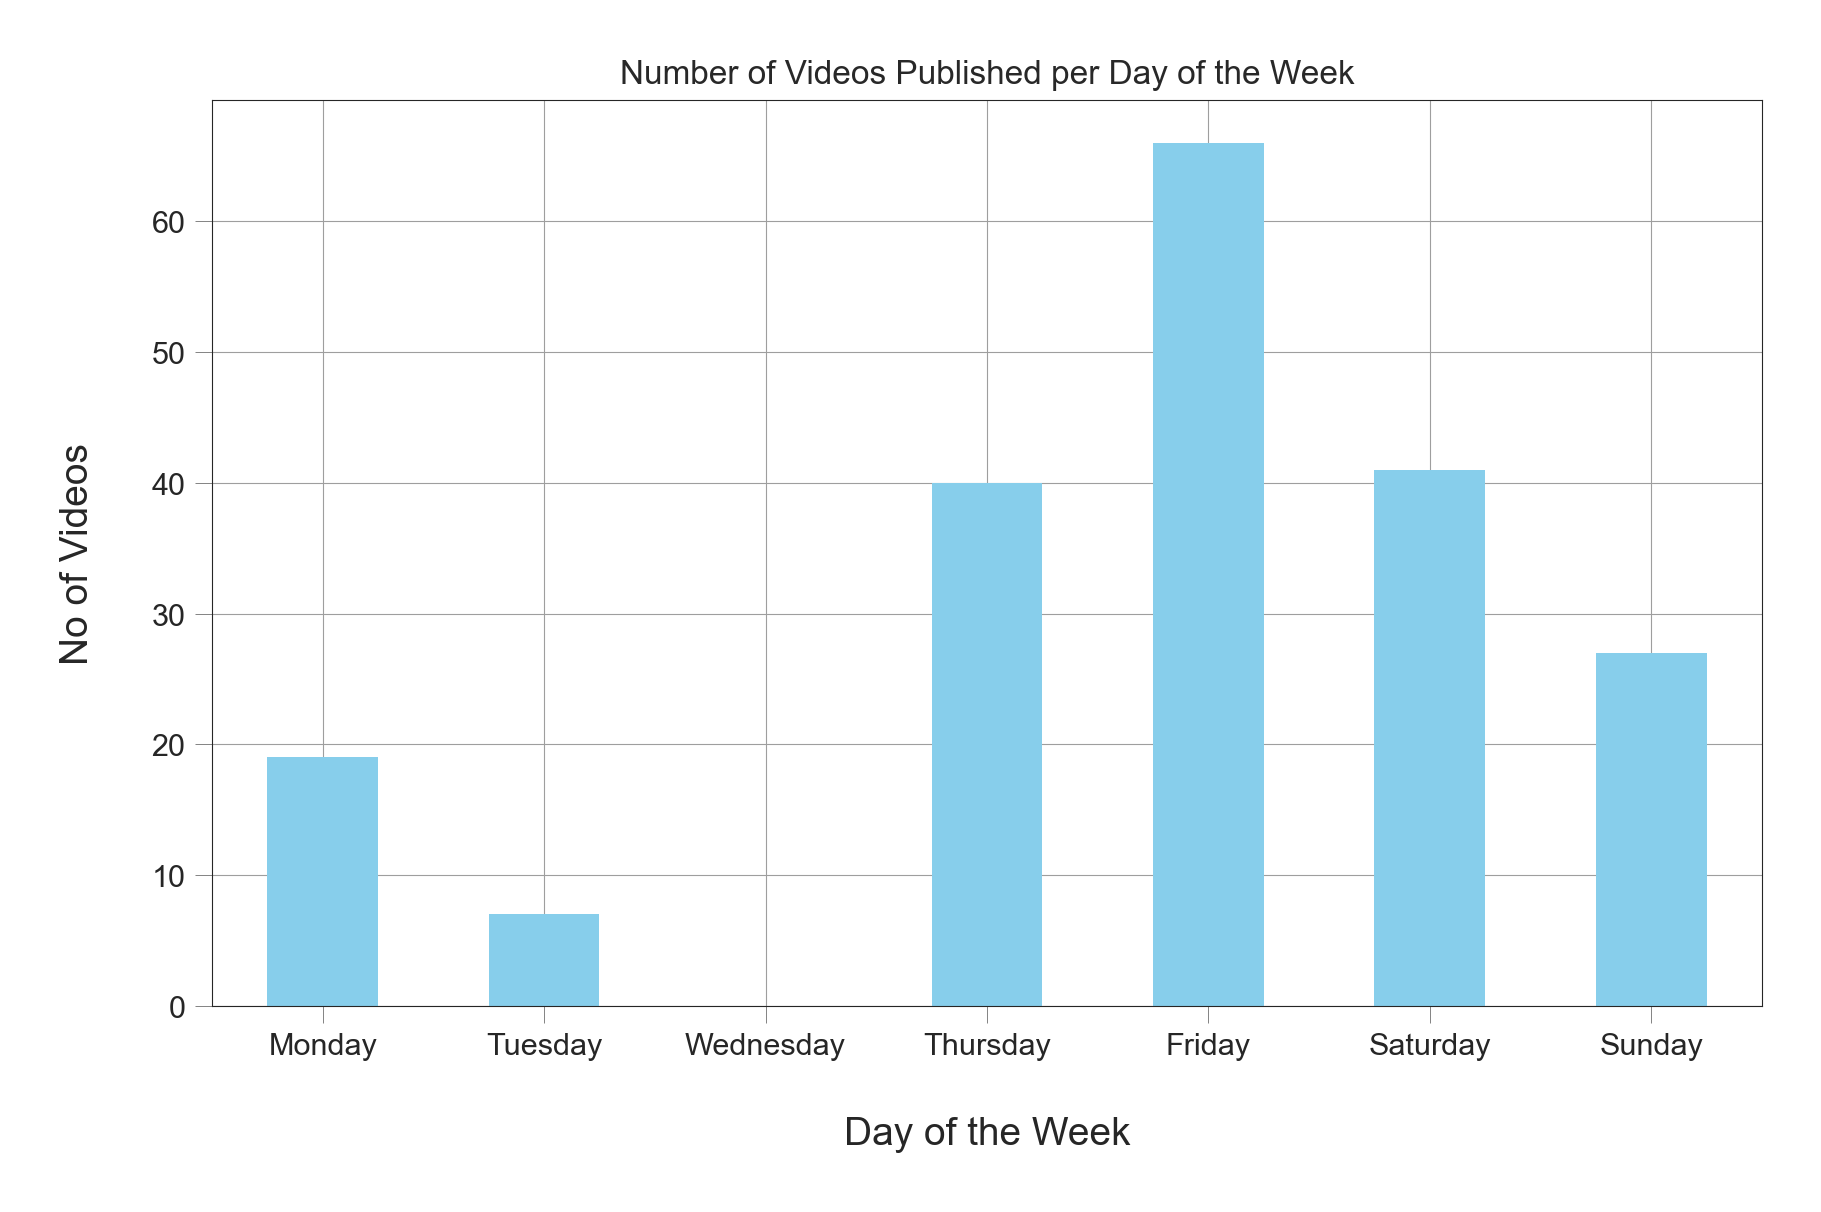

In [23]:
# Convert 'publishedAt' column to datetime
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Extract the day of the week
df['day_of_week'] = df['publishedAt'].dt.day_name()

# Group by day of the week and count the number of videos
day_counts = df['day_of_week'].value_counts()

# Sort the days of the week in the desired order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(days_order)

# Create a bar chart
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Videos Published per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('No of Videos')
plt.xticks(rotation=0)
plt.show()

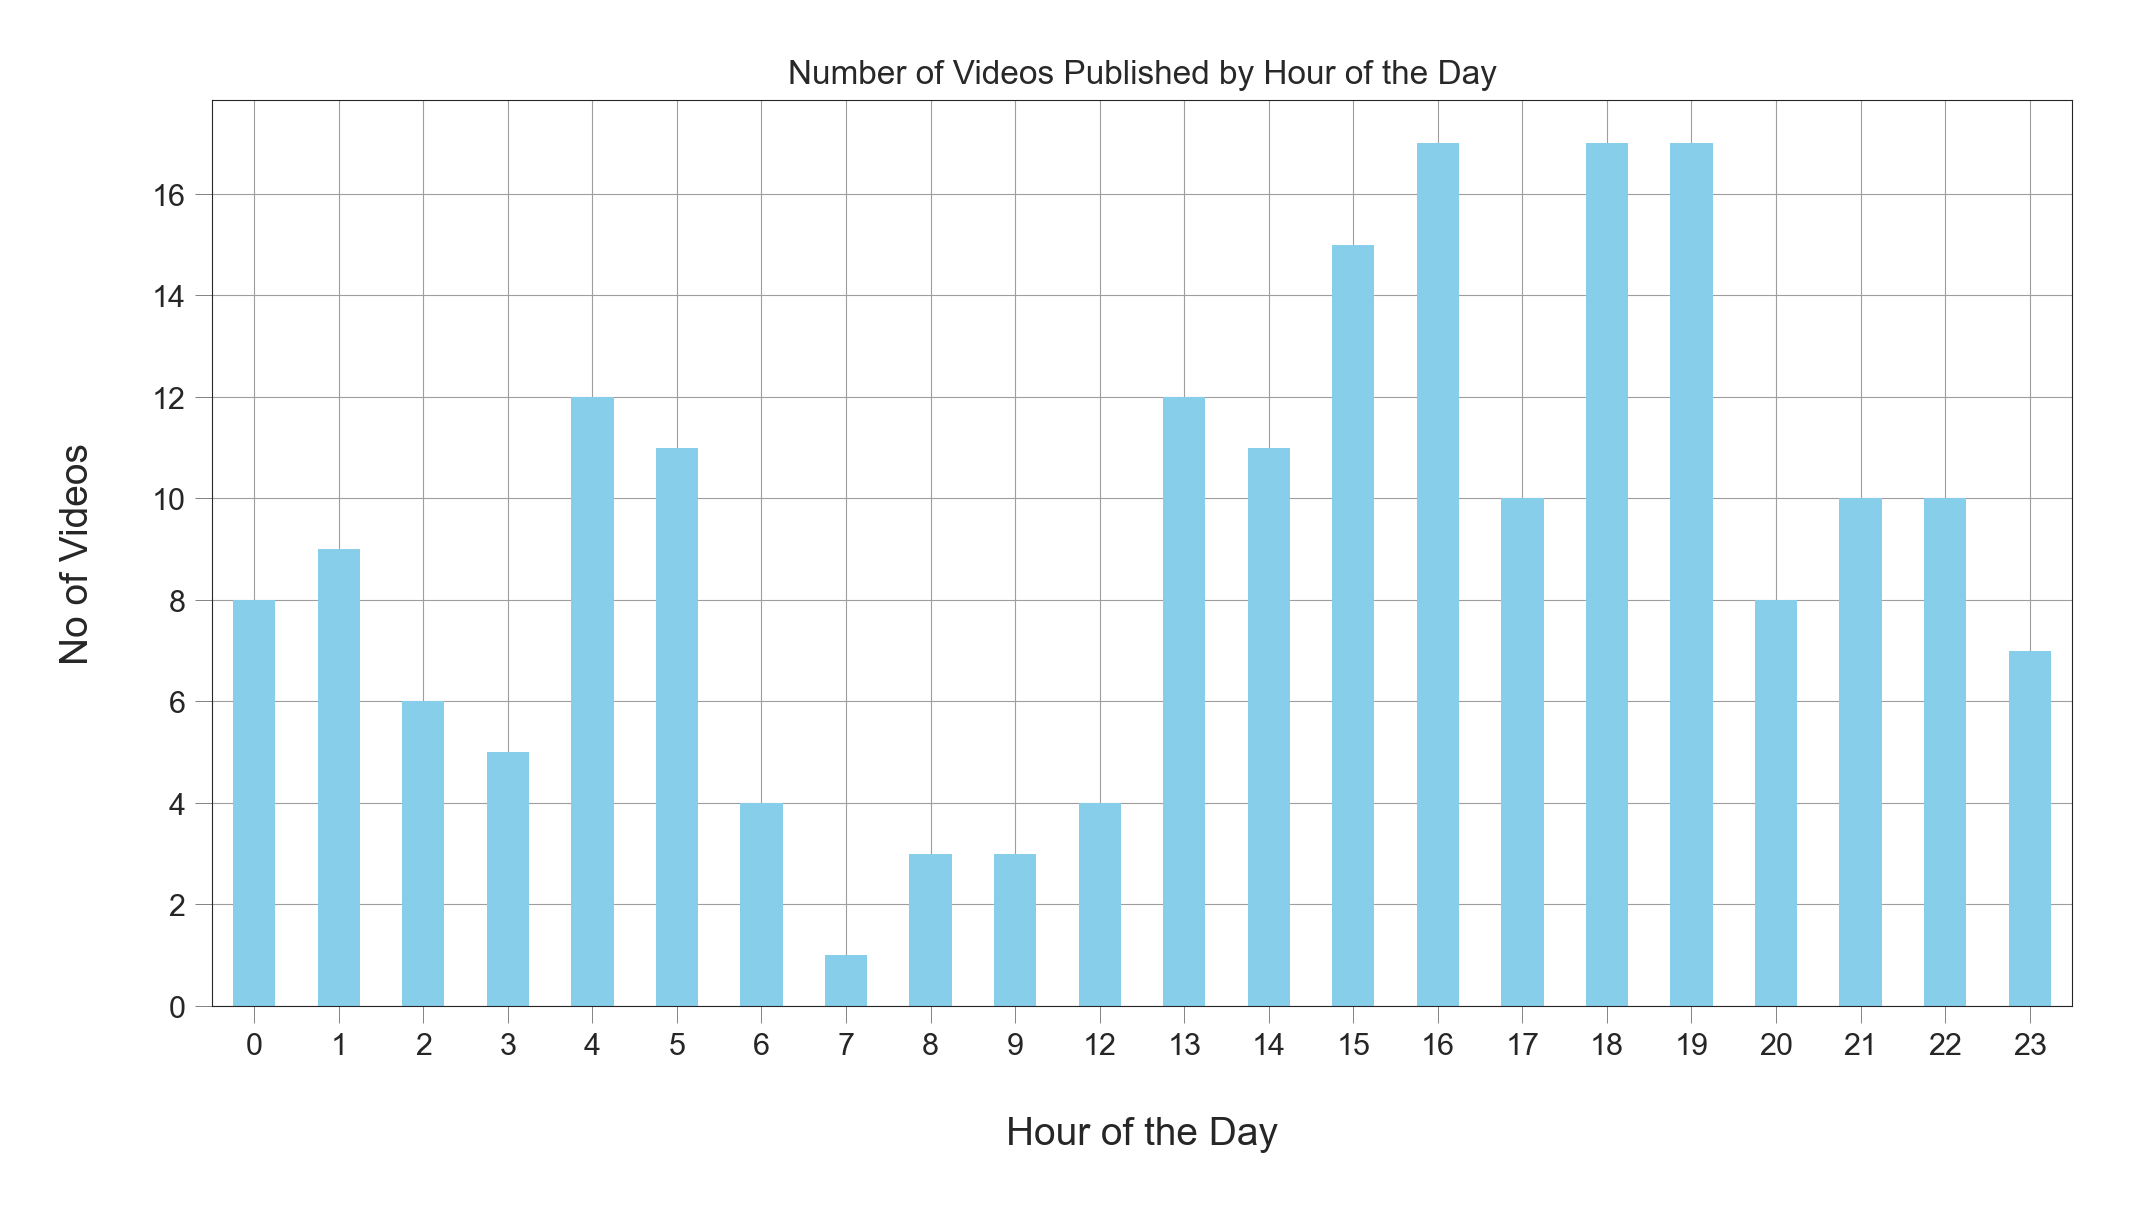

In [24]:
# Extract the hour of the day
df['hour_of_day'] = df['publishedAt'].dt.hour

# Group by hour of the day and count the number of videos
hour_counts = df['hour_of_day'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
hour_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Videos Published by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('No of Videos')
plt.xticks(rotation=0)
plt.show()